In [1]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 12.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [2]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
import spacy.cli; 
spacy.cli.download("en_core_web_lg"); 

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


**Documents without preprocessing**

In [ ]:
nlp = spacy.load("en_core_web_lg")

documents = []

with open("output-2.json", "r") as file: 
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        line_data = f[line]
        documents.append(line_data["MsgBody"])

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(str(document)):
        temp_list.append(str(token))
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [ ]:
# print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(1, 0.06348545278146689), (4, 0.04688326473409613), (6, 0.0886503343228389), (9, 0.06256032416271295), (24, 0.08696786368621812), (25, 0.06289593431866278), (26, 0.2640649899403244), (27, 0.307756325473669), (28, 0.24374967583251694), (29, 0.14911615531237435), (30, 0.050477038544348825), (31, 0.08172281646716169), (32, 0.16619812678897533), (33, 0.23649882637906347), (34, 0.307756325473669), (35, 0.08013182161323568), (36, 0.2303683205177181), (37, 0.23649882637906347), (38, 0.28019016191240803), (39, 0.307756325473669), (40, 0.16309109728044166), (41, 0.13994832911866384), (42, 0.18861734870999503), (43, 0.25262399835114707), (44, 0.17974302619136487), (45, 0.06660221051643243), (46, 0.10101434706608316), (47, 0.15817502371884543), (48, 0.09080056432685521), (49, 0.1498595333572877)]


**Documents with preprocessing**

In [7]:
nlp = spacy.load("en_core_web_lg")

documents = []

with open("output-2.json", "r") as file: 
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        line_data = f[line]
#for line in open("output.json", "r"):
        text = line_data["MsgBody"]
        doc = nlp(str(text))
        if len(doc) <= 5: # exclude comments with five or less than five words
            pass
        else:
            documents.append(text.replace("-","").replace("s","").replace(":","").replace('"',"").replace("r","").replace(">","").replace("<","").replace("*","").replace("}","").replace("{","").replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))
# replace("yu","").replace("po","").replace("eal","").replace("evey","").replace("mat","").replace("wa","").replace("moe","").replace("fo","").replace("o","").replace("ae","").
processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document.lower()):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [8]:
print(corpus_tfidf[2])

[(5, 0.11918030094688294), (6, 0.22600732302771964), (7, 0.45893004645270996), (8, 0.2767175074854566), (9, 0.2128971202755405), (10, 0.45893004645270996), (11, 0.3626063128184584), (12, 0.1406442836006974), (13, 0.2796375646937027), (14, 0.2662825791842067), (15, 0.22131085171606504), (16, 0.20552173291854117)]


In [36]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=12, iterations=200,passes=10) # train LDA model

In [38]:
for topic in lda_model.show_topics(num_topics=12, num_words=7):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.023*"know" + 0.021*"go" + 0.019*"moon" + 0.011*"let" + 0.011*"want" + 0.011*"ee" + 0.011*"ae"')
(1, '0.019*"thee" + 0.016*""" + 0.012*"die" + 0.011*"😂" + 0.011*"o" + 0.011*"…" + 0.010*"ya"')
(2, '0.016*"ve" + 0.016*"smell" + 0.016*"ath" + 0.014*"👀" + 0.014*"ok" + 0.013*"bull" + 0.013*"hit"')
(3, '0.039*"con" + 0.036*"po" + 0.024*"info" + 0.022*"evey" + 0.018*"&" + 0.018*"comment" + 0.017*"pot"')
(4, '0.021*"o" + 0.020*"thi" + 0.017*"wa" + 0.015*"pot" + 0.015*"comment" + 0.014*"contact" + 0.013*"bot"')
(5, '0.023*"mat" + 0.019*"end" + 0.016*"afte" + 0.015*"money" + 0.014*"tie" + 0.014*"tun" + 0.014*"got"')
(6, '0.020*"eal" + 0.015*"coin" + 0.014*"dolla" + 0.011*"node" + 0.011*"hould" + 0.011*"light" + 0.009*"usd"')
(7, '0.018*"flow" + 0.017*"ene" + 0.016*"land" + 0.016*"idea" + 0.016*"20" + 0.015*"ub" + 0.015*"face"')
(8, '0.026*"doe" + 0.022*"int" + 0.019*"goe" + 0.018*"alway" + 0.016*"office" + 0.013*"channel" + 0.013*"feeling"')
(9, '0.026*"wiki" + 0.019*"bitcoin" + 0.016*"rel

As we can see from above output, there are three main themes in the 5 topics. 
1. moon - type of cryptocurrency
2. bitcoin - type of cryptocurrency
3. dutch -  Refers to the Dutch Authority for the Financial Markets's (AFM) increased scrutiny and tightening of the cryptocurrencies



In [39]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

In [40]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.5028868071193562


In [41]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2, iterations=20,passes=10,alpha = 'auto') # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

topic_coherence = pd.DataFrame({'number_of_topics':num_of_topics,
                                'coherence_score':coherence})

**k value of 12 was chosen as it was giving mostly well separated topics with a good coherence value of around .50** 

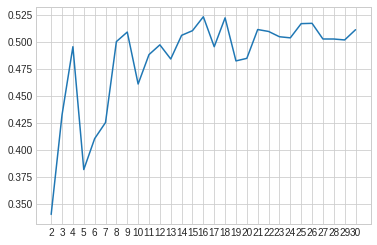

In [42]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [ ]:
# Other parameters related to training 
#lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=?, chunksize=?, passes=?, iterations=?)

In [43]:
print(topic_coherence)
print(max(topic_coherence.coherence_score))

    number_of_topics  coherence_score
0                  2         0.340083
1                  3         0.432151
2                  4         0.495235
3                  5         0.381584
4                  6         0.410196
5                  7         0.425108
6                  8         0.499953
7                  9         0.508795
8                 10         0.460723
9                 11         0.487932
10                12         0.496959
11                13         0.483873
12                14         0.505766
13                15         0.510062
14                16         0.522952
15                17         0.495217
16                18         0.521939
17                19         0.482095
18                20         0.484459
19                21         0.511113
20                22         0.509351
21                23         0.504451
22                24         0.503433
23                25         0.516577
24                26         0.516859
25          

Example documents related to topics

**Topic  1 - moon**

'So you actually think average daily transaction = best available transaction speed? ROTFL! When the Cardano chain was first tested in 2017 it processed  257 tps. You think its top speed got slower since then? OMG youre adorable.  You can talk about theoretical security flaws all day long. Cardano hasnt had a roll-back. Ethereum has. Bitcoin has. Cardano hasnt.   At the very least that means Cardanos security design is superior to both Ethereum and Bitcoin because.. wait for it.. Cardano hasnt been rolled back. I understand you arent American so you dont actually understand how the world works but dude quit living the stereotype of the stupid non-American ok? It isnt helping you.'

'Maybe I will just purchase moons every month instead of trying to farm moons.'

**Topic 10 - bitcoin** 

'I got the same thing but didnt bother reading into it as it was like 1 am. I also had some offer me free Bitcoin in a random message as well.'

'Bitcoin. My issue with Eth is the transition to PoS and its ever-decreasing decentralization. I prefer Bitcoin/Monero as my top 2 holdings'

**Topic 11 - dutch**

'Getting a Dutch fine is much better than getting a Dutch oven.'

'They actually filled out paperwork and all the Dutch are just claiming they didnt fill out the *correct* paperwork.'


